In [7]:
import prep
import glob
import numpy as np
import matplotlib.pyplot as plt
import build_spectral_table
import george
from george import kernels
import math

In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib notebook
# plt.ioff()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
file_names = glob.glob("../../../cfa_test_data/*.flm")
print len(file_names)

2562


In [12]:
NED_red_dict = build_spectral_table.build_NED_redshift_dict('../data/info_files/NED_redshift_info.txt')
sndict, date_dict = build_spectral_table.read_cfa_info('../data/spectra/cfa/cfasnIa_param.dat',
                                      '../data/spectra/cfa/cfasnIa_mjdspec.dat')
bsnip_vals = build_spectral_table.read_bsnip_data('obj_info_table.txt')
short_bsnip_dict = build_spectral_table.create_short_bsnip_dict(bsnip_vals)
rsd = build_spectral_table.build_redshift_dict(short_bsnip_dict, sndict)

In [13]:
def round_up_to_even(f):
    return math.ceil(f / 2.) * 2

In [ ]:
test_file = file_names[1855]#low variance at blue end
# test_file = file_names[1000]#high snr (variance oscillates with low kernel param)
spectrum = np.loadtxt(test_file)

3500.0 7412.0


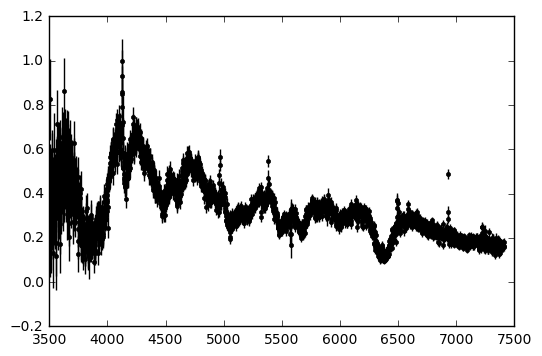

In [189]:
wave = spectrum[:, 0]
flux = spectrum[:, 1]
err = spectrum[:, 2]
wave1 = round_up_to_even(wave[0])
wave2 = round_up_to_even(wave[-1])
print wave1, wave2
scale = np.max(flux)
flux = flux/scale
err = err/scale
plt.errorbar(wave, flux, yerr=err, fmt=".k", capsize=0)
plt.show()

In [190]:
kernel = np.var(flux) * kernels.Matern52Kernel(50.0)
# kernel = np.var(flux) * kernels.ExpSquaredKernel(.5)
gp = george.GP(kernel)
gp.compute(wave, err)
numpoints = (wave2+2 - wave1)/2.
wave_pred = np.linspace(wave1, wave2, numpoints)
pred, pred_var = gp.predict(flux, wave_pred, return_var=True)

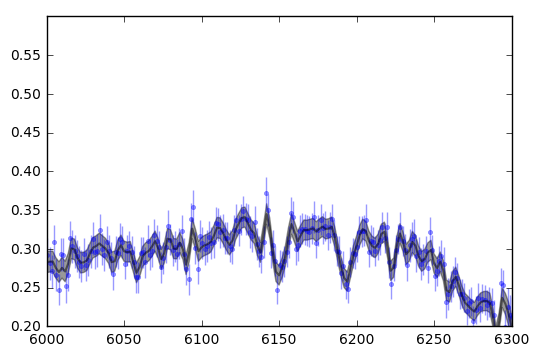

In [191]:
plt.errorbar(wave, flux, yerr=err, fmt=".b", capsize=0, alpha=.4)
plt.fill_between(wave_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.4)
plt.plot(wave_pred, pred, "k", lw=1.5, alpha=0.5)
plt.xlim(6000 ,6300)
plt.ylim(.2 , .6)
plt.show()

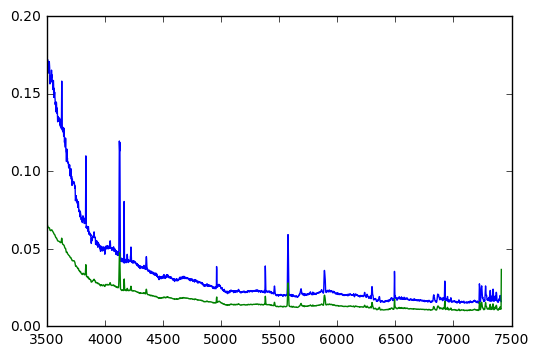

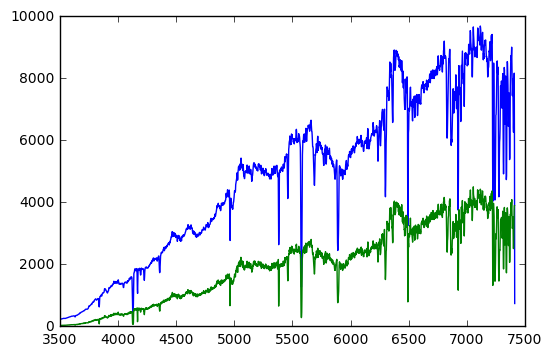

In [194]:
plt.plot(wave,err)
plt.plot(wave_pred, np.sqrt(pred_var))
plt.show()
plt.plot(wave_pred, 1./pred_var)
plt.plot(wave,1./(err**2.))
# plt.xlim(5400 ,5408)
plt.show()

../../../cfa_test_data\sn2005lz-20051227.29-fast.flm
2005lz cfa 0.044341
0.00401155363082 13.3155982742


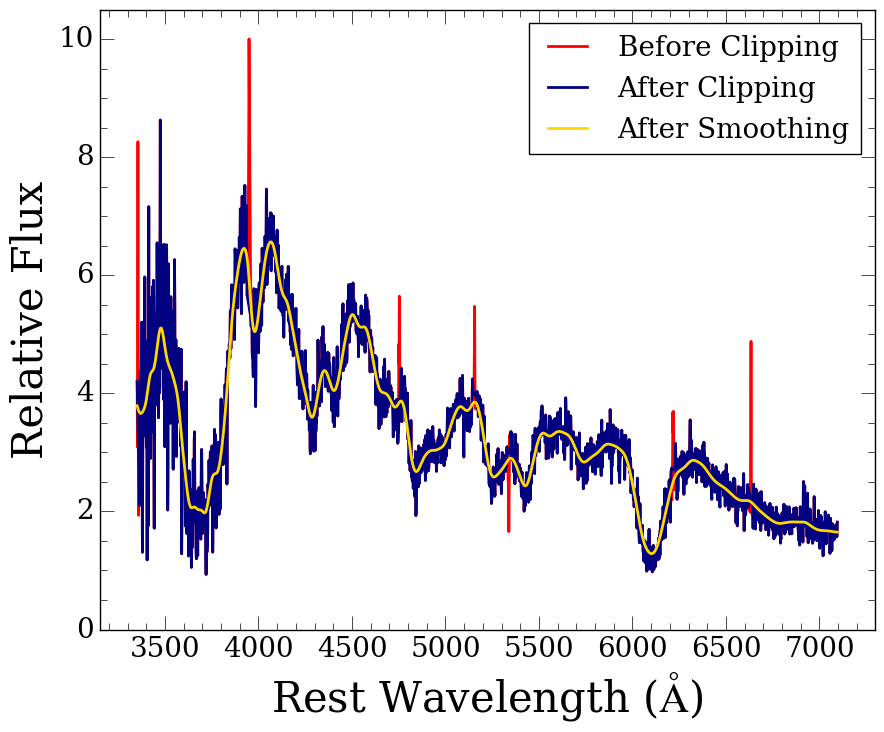

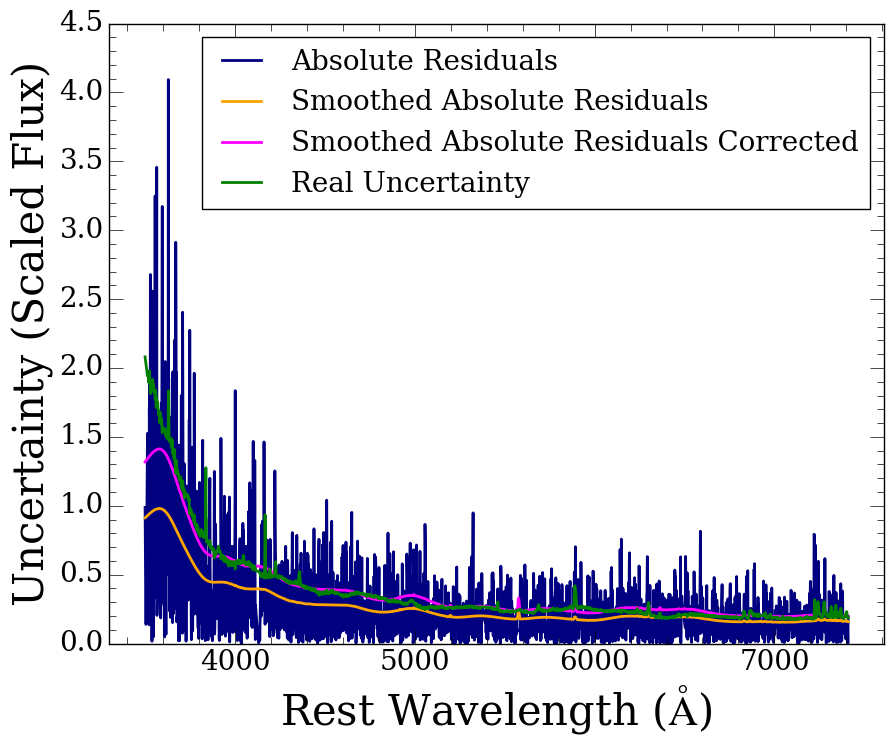

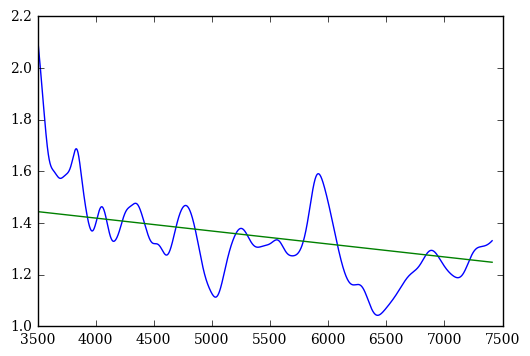

12.534833761


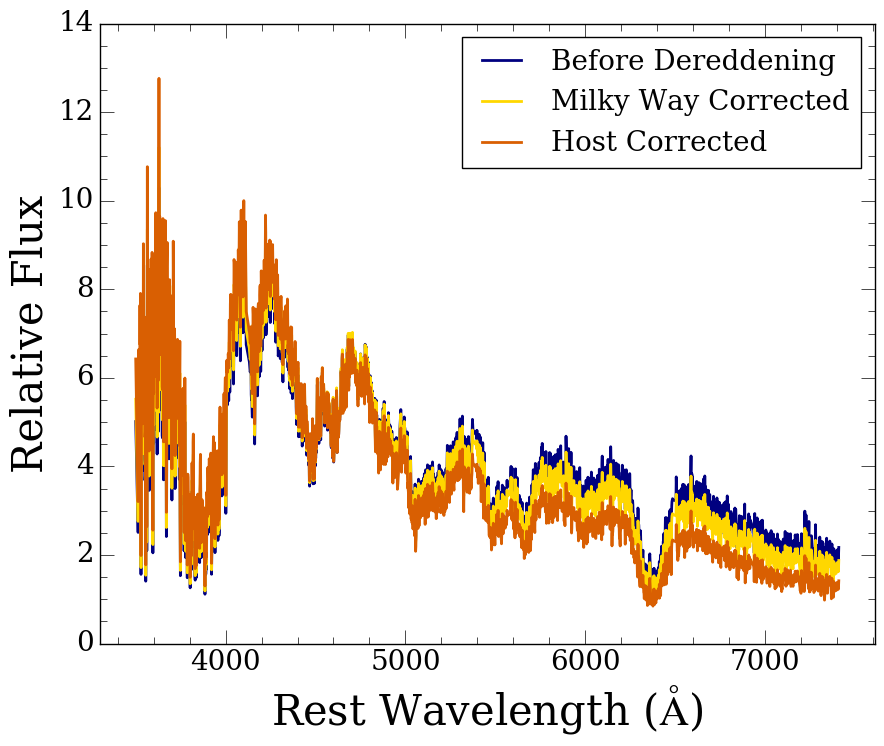

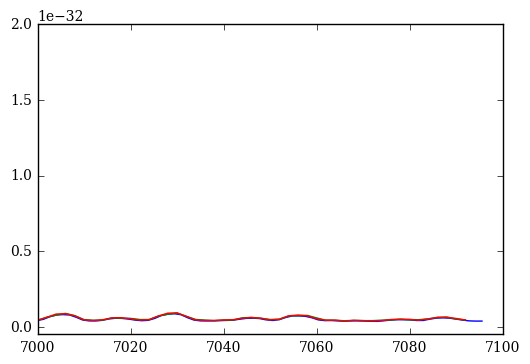

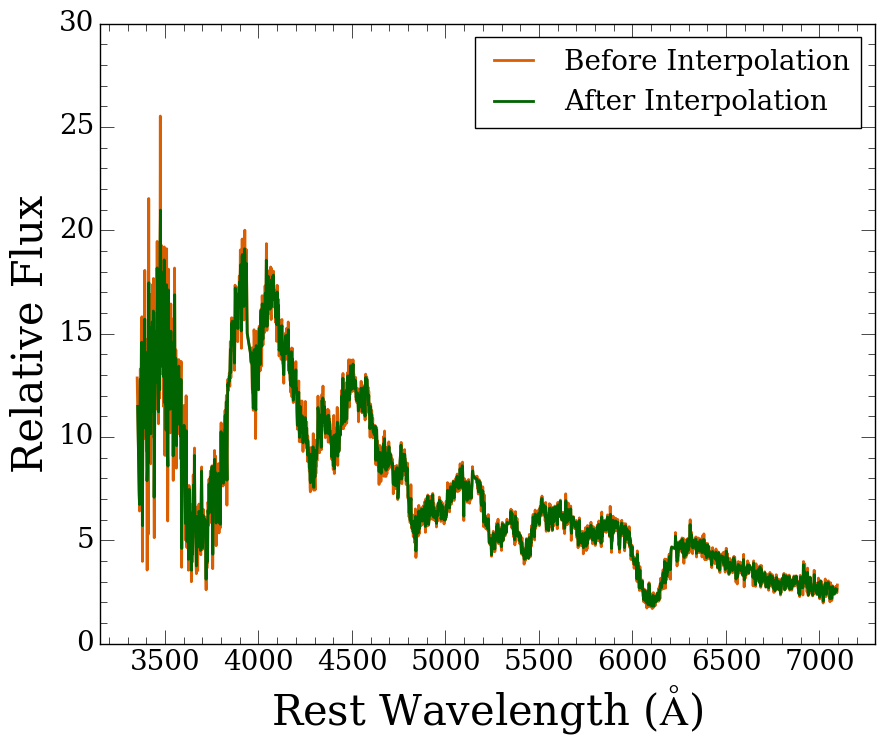

[[  1000.   1002.   1004. ...,  11996.  11998.  12000.]
 [    nan     nan     nan ...,     nan     nan     nan]
 [    nan     nan     nan ...,     nan     nan     nan]]


In [14]:
#potential examples: 1855, 1862
test_file = file_names[1855] #2005lz for paper
# test_file = '../../../cfa_test_data\sn2001V-20010318.47-fast.flm'
# test_file = file_names[165]
print test_file
sn_name = test_file.split('\\')[1].split('-')[0][2:]
source = 'cfa'
redshift = NED_red_dict.get(sn_name.lower(), None)
if redshift is None:
    redshift = rsd.get(sn_name.lower(), None)
spectrum = np.loadtxt(test_file)
print sn_name, source, redshift
interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing=True)
print interp_spec

In [175]:
for f in file_names:
    print f
    sn_name = f.split('\\')[1].split('-')[0][2:]
    source = 'cfa'
    redshift = NED_red_dict.get(sn_name.lower(), None)
    if redshift is None:
        redshift = rsd.get(sn_name.lower(), None)
    spectrum = np.loadtxt(f)
#     print sn_name, source, redshift
    if len(spectrum[0,:]) == 3:
        interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing=False)

../../../cfa_test_data\sn1993ac-19931016.49-mmt.flm
../../../cfa_test_data\sn1993ac-19931020.52-mmt.flm
../../../cfa_test_data\sn1993ae-19931213.11-mmt.flm
../../../cfa_test_data\sn1994ae-19941129.51-fast.flm
[  9.02167682e-05   8.75131870e-01]
../../../cfa_test_data\sn1994ae-19941130.49-fast.flm
[ -2.73560115e-05   1.50231382e+00]
../../../cfa_test_data\sn1994ae-19941201.50-fast.flm
[  1.73760336e-04   2.46927420e-01]
../../../cfa_test_data\sn1994ae-19941202.53-fast.flm
[ -9.08645048e-05   2.05872492e+00]
../../../cfa_test_data\sn1994ae-19941203.54-fast.flm
[ -7.80763713e-05   1.98718091e+00]
../../../cfa_test_data\sn1994ae-19941204.53-fast.flm
[ -2.73077176e-05   1.70146241e+00]
../../../cfa_test_data\sn1994ae-19941207.47-fast.flm
[ -5.24976995e-05   1.87606672e+00]
../../../cfa_test_data\sn1994ae-19941207.55-mmt.flm
../../../cfa_test_data\sn1994ae-19941208.55-fast.flm
[ -1.65344074e-05   1.59189944e+00]
../../../cfa_test_data\sn1994ae-19941209.50-fast.flm
[ -4.53637087e-05   1.70224

ValueError: Wrong number of columns at line 2634

In [177]:
c1s = []
c2s = []
with open('genvar_scaling_fits.txt') as fits:
    for line in fits.readlines():
        if len(line.split())==2:
            c1s.append(float(line.split()[0]))
            c2s.append(float(line.split()[1]))

In [183]:
mc1 = np.average(c1s)
sc1 = np.std(c1s)
mc2 = np.average(c2s)
sc2 = np.std(c2s)
print mc1, sc1
print mc2, sc2

-5.01307400136e-05 7.876938533e-05
1.61999679746 0.509216337743


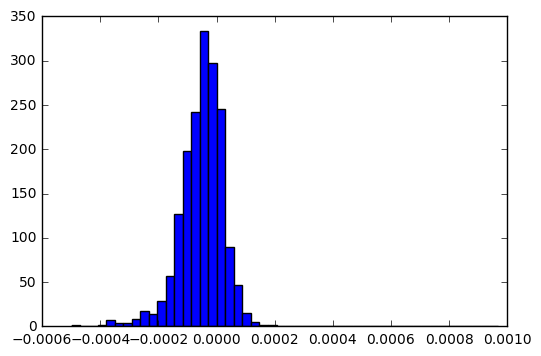

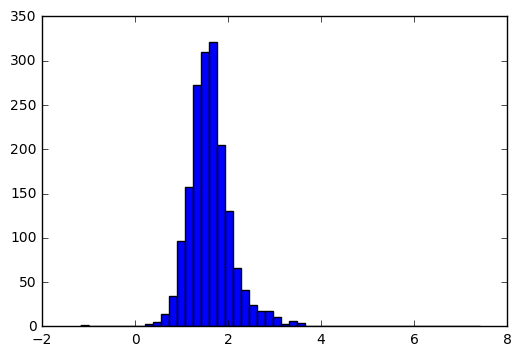

In [180]:
plt.hist(c1s, bins = 50)
plt.show()
plt.hist(c2s, bins = 50)
plt.show()

In [ ]:
wavelength = interp_spec[0]
flux = interp_spec[1]
ivar = interp_spec[2]

In [ ]:
plt.plot(wavelength,flux)
plt.show()

[ -4.51612903e-05   4.61290323e-03]
0.00145161290323


<IPython.core.display.Javascript object>


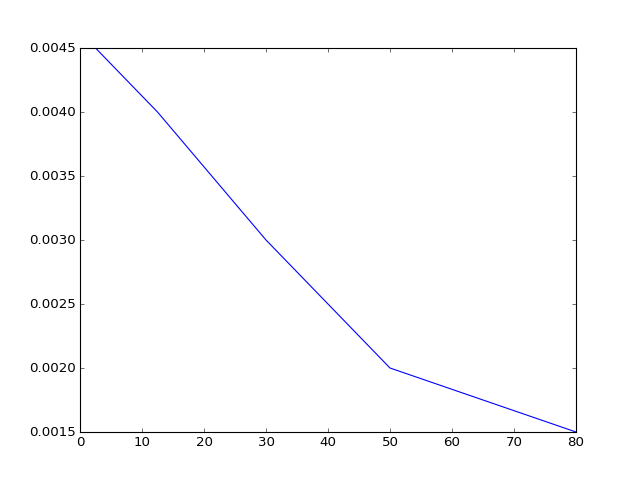

In [205]:
snr = [2.5, 12.5, 30, 50, 80]
vexp = [.0045, .004, .003, .002, .0015]
vexp_line = np.polyfit([2.5, 80], [.0045, .001], 1)
print vexp_line
test_SNR = 70
test_val = vexp_line[0] * test_SNR + vexp_line[1]
print test_val
plt.plot(snr, vexp)
plt.show()

In [51]:
bsnip_names = glob.glob("../../../bsnip_test_data/*.flm")

../../../bsnip_test_data\sn2004dt-20040816.413-ui-corrected.flm
2004dt bsnip 0.01973


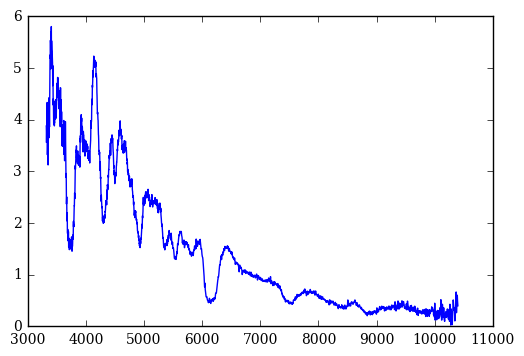

0.00262366410245 44.0474378463


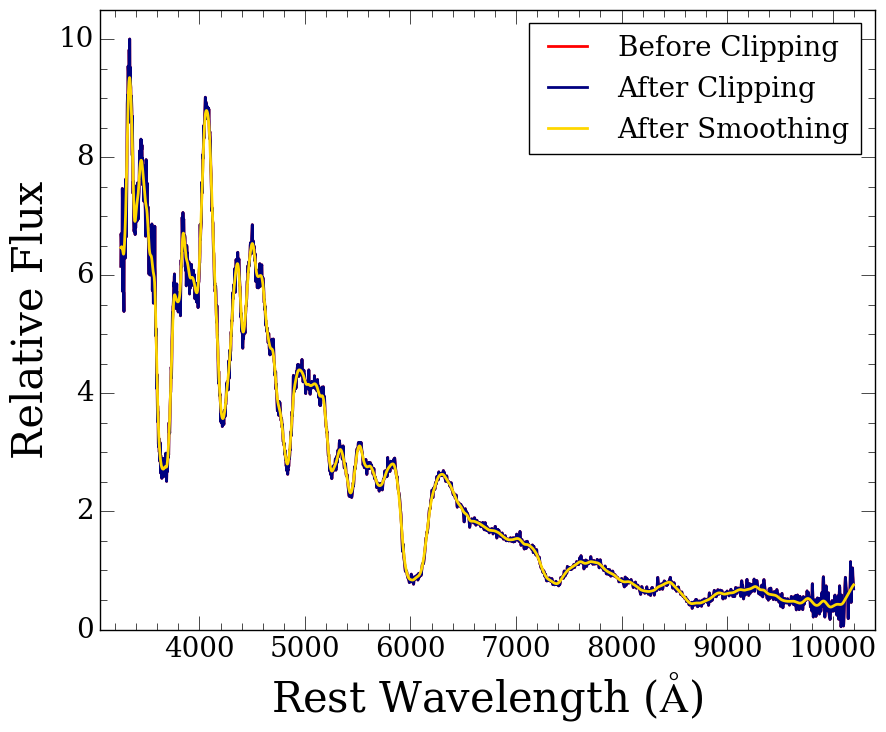

[ 0.544303    0.67099702  0.764512   ..., -0.0143721  -0.0197721  -0.0089651 ]
2.0


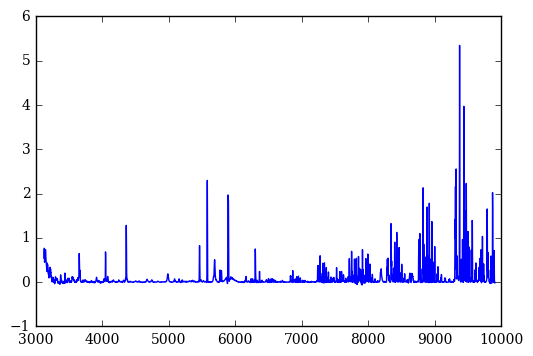

0.278048100163


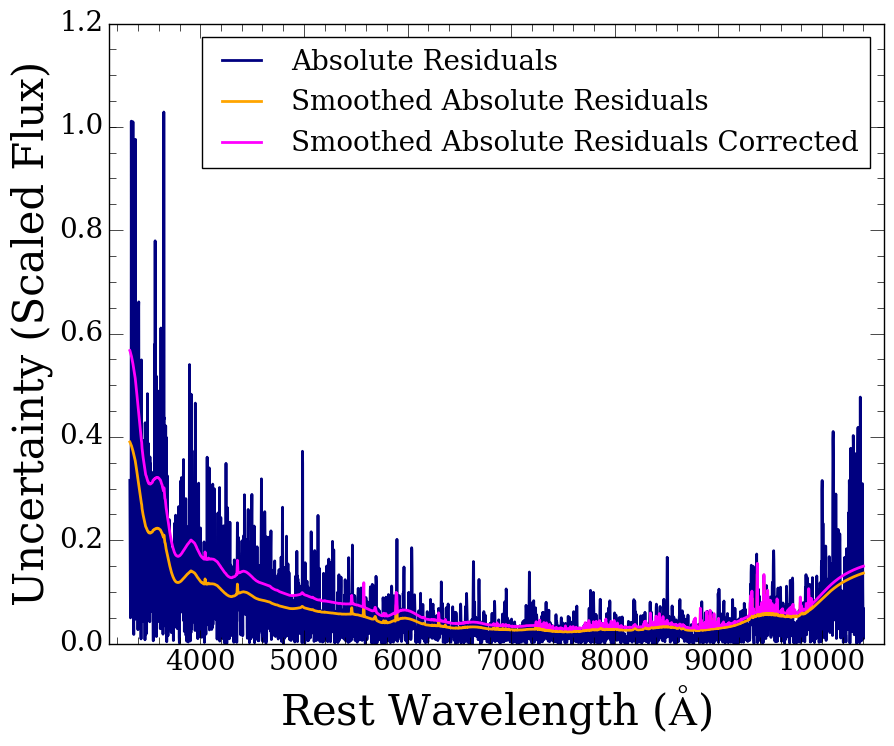

30.6375497953
Milky Way correction...


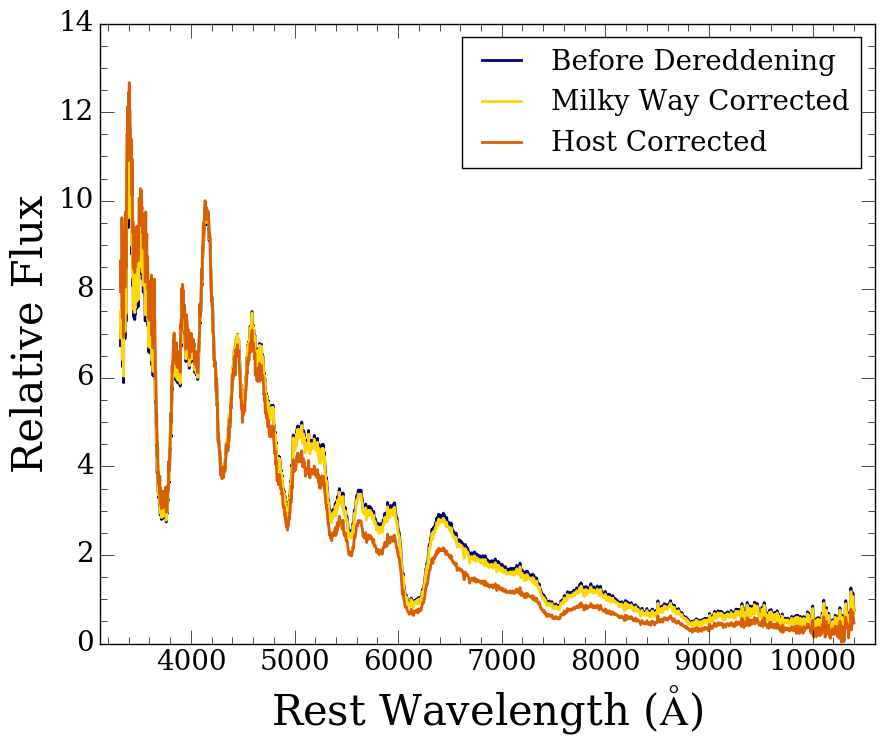

1.96130348229
1.41867553339


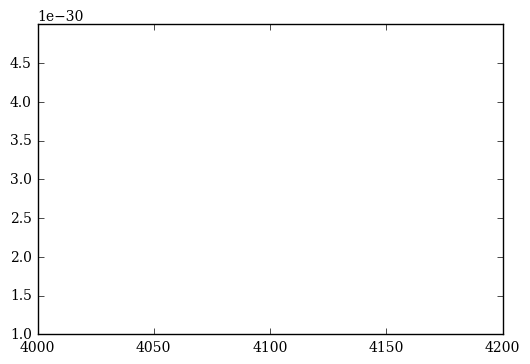

1.96130348229


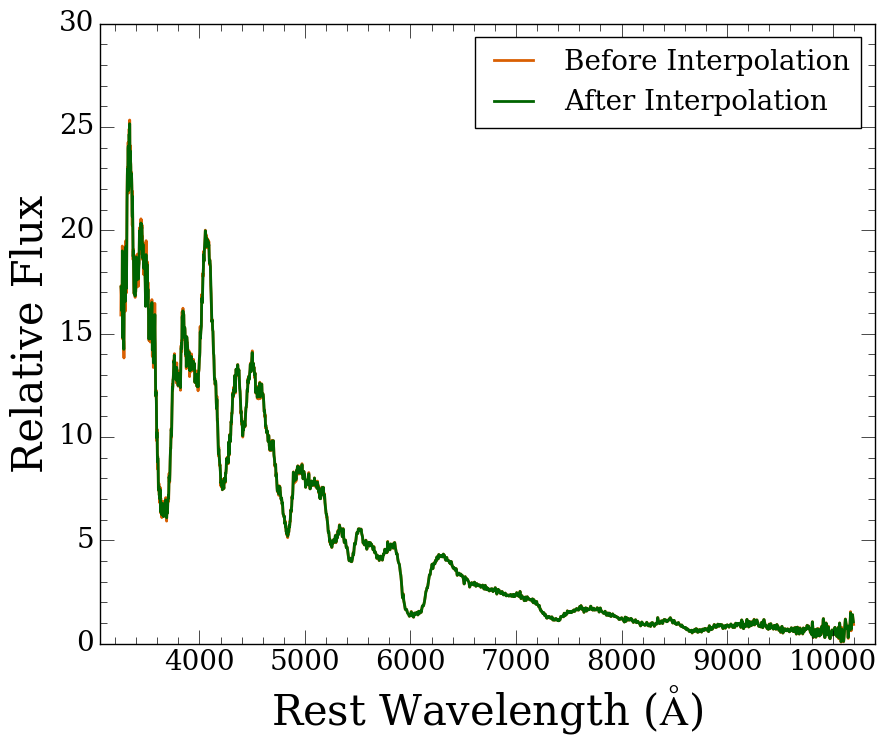

In [94]:
test_file = bsnip_names[300]
test_file = '../../../bsnip_test_data\sn2004dt-20040816.413-ui-corrected.flm'
print test_file
sn_name = test_file.split('\\')[1].split('-')[0][2:]
source = 'bsnip'
redshift = NED_red_dict.get(sn_name.lower(), None)
if redshift is None:
    redshift = rsd.get(sn_name.lower(), None)
spectrum = np.loadtxt(test_file)
print sn_name, source, redshift
interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing=True)

In [19]:
%matplotlib inline
csp_names = glob.glob("../../../csp_test_data/*.dat")

../../../csp_test_data\SN08fp_080921_b01_DUP_WF.dat
2008fp csp 0.005664
0.001 104.272406583


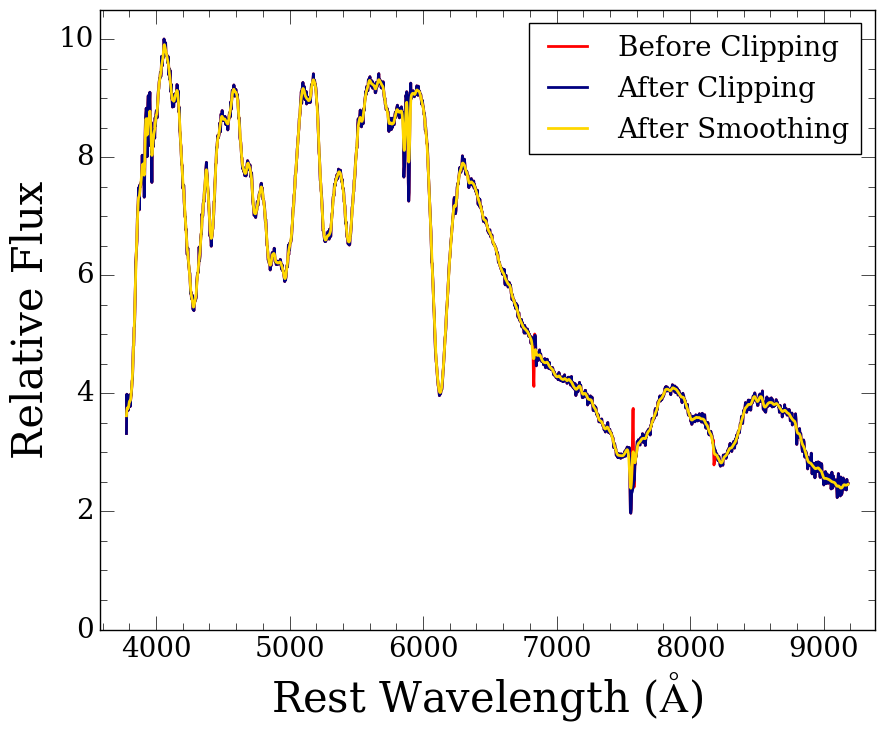

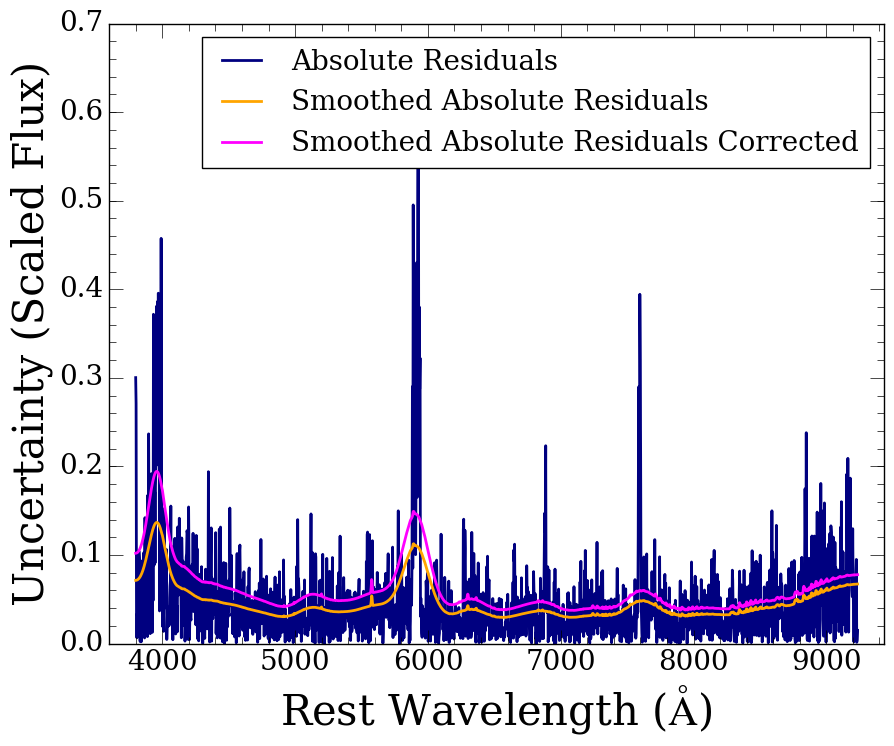

101.525719149
Milky Way correction...


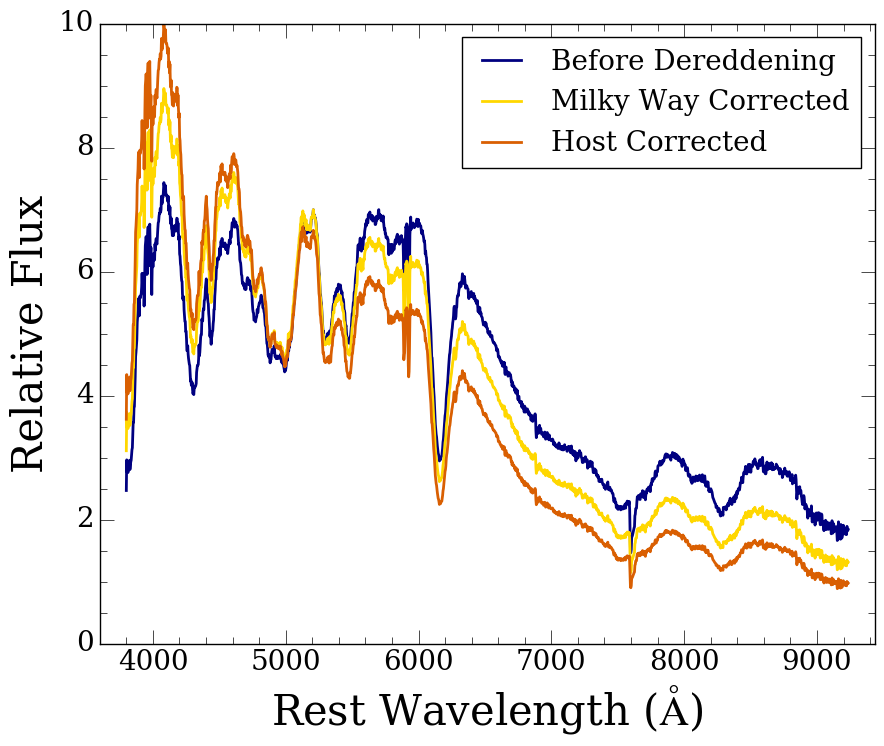

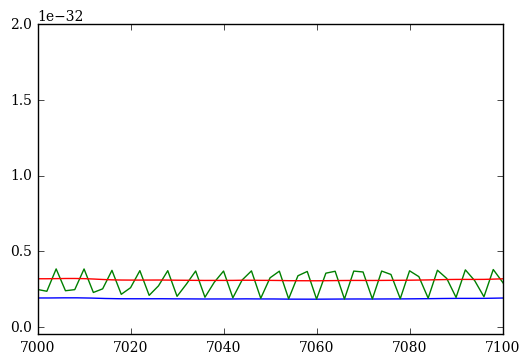

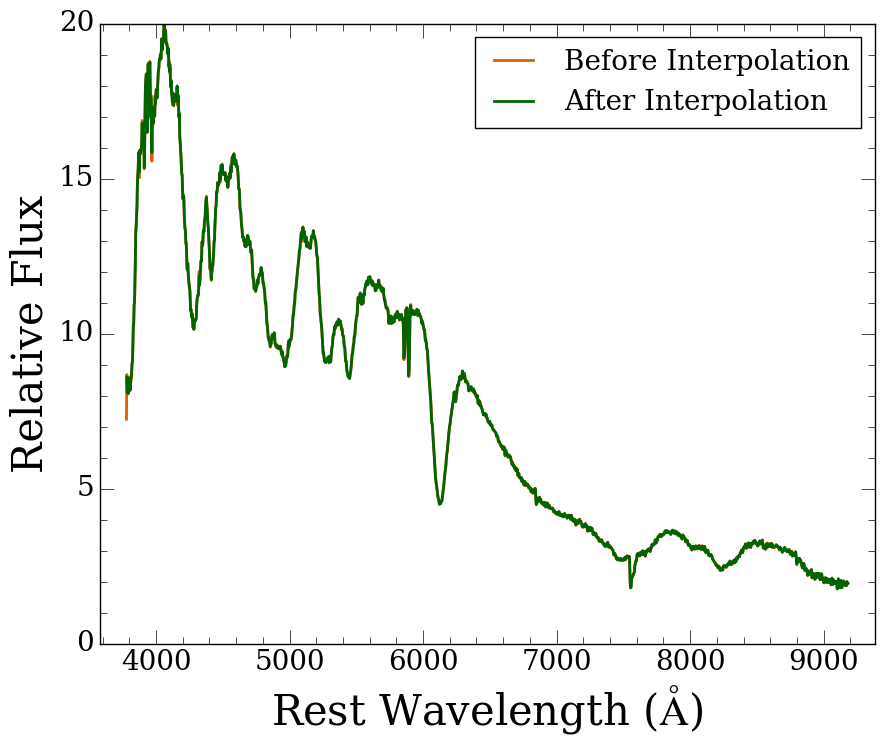

In [31]:
test_file = csp_names[10]
test_file = '../../../csp_test_data\SN08fp_080921_b01_DUP_WF.dat'
print test_file
sn_name = test_file.split('\\')[1].split('-')[0][2:]
sn_name = '20' + test_file.split('\\')[1].split('_')[0][2:].lower()
source = 'csp'
redshift = NED_red_dict.get(sn_name.lower(), None)
if redshift is None:
    redshift = rsd.get(sn_name.lower(), None)
spectrum = np.loadtxt(test_file)
print sn_name, source, redshift
interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing=True)

In [239]:
other_names = glob.glob("../../../other_test_data/*.dat")

../../../other_test_data\2003du_20030601_3242_8057_00.dat
2003du other 0.006384


<IPython.core.display.Javascript object>


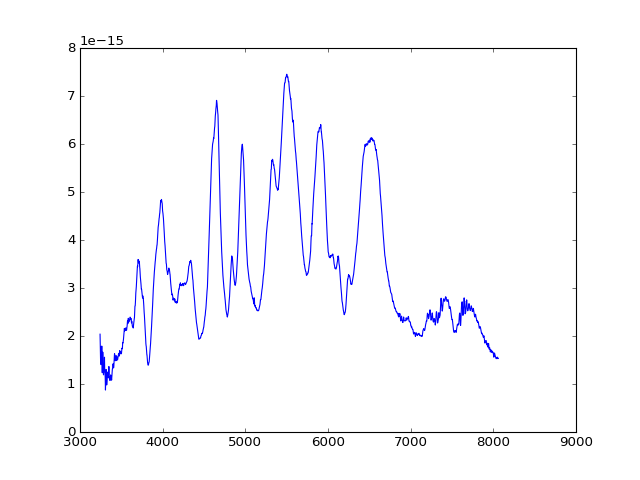

0.001 111.13993168


<IPython.core.display.Javascript object>


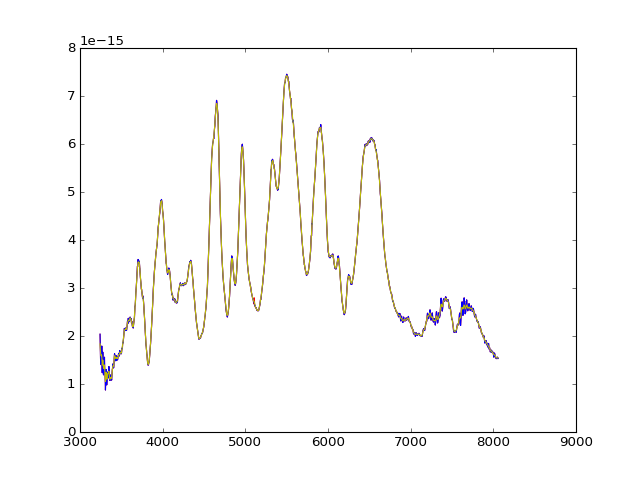

<IPython.core.display.Javascript object>


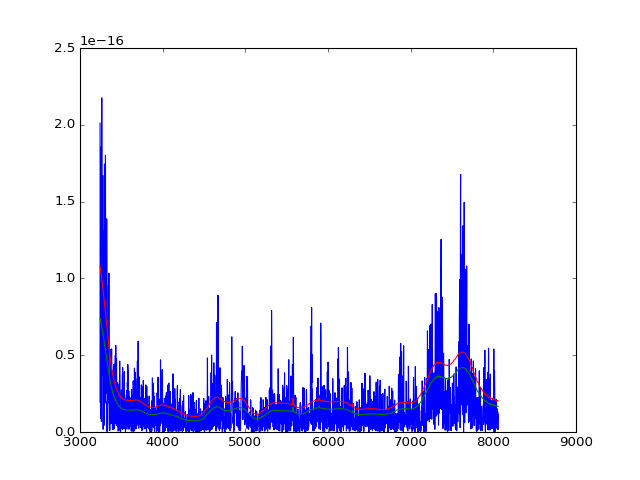

180.951804851
Milky Way correction...


<IPython.core.display.Javascript object>


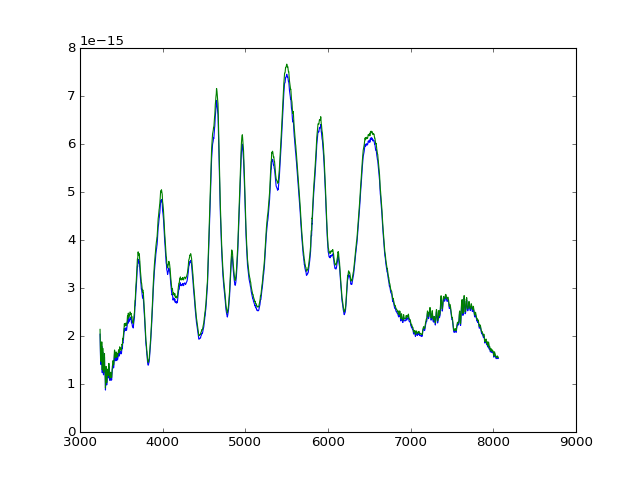

<IPython.core.display.Javascript object>


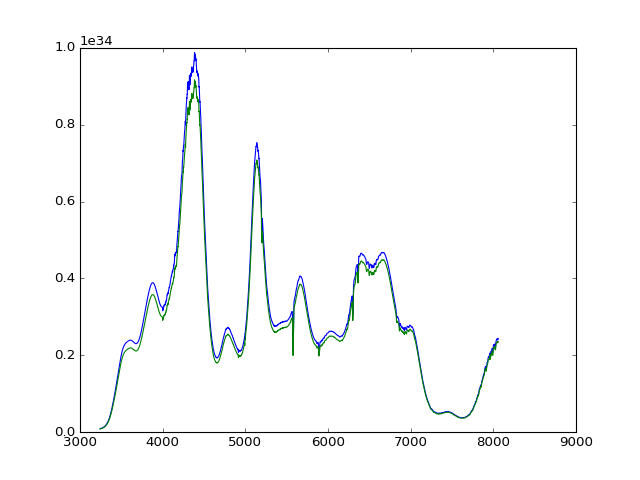

In [240]:
test_file = other_names[100]
# test_file = '../../../cfa_test_data\sn2001V-20010325.40-mmt.flm'
print test_file
sn_name = test_file.split('\\')[1].split('_')[0]
source = 'other'
redshift = NED_red_dict.get(sn_name.lower(), None)
if redshift is None:
    redshift = rsd.get(sn_name.lower(), None)
spectrum = np.loadtxt(test_file)
print sn_name, source, redshift
interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing=True)

In [237]:
swift_names = glob.glob("../../../swift_uvspec/*.flm")

../../../swift_uvspec\sn2009an-20090312.24-fixedbg-swift.flm
2009an swift_uv 0.009233


<IPython.core.display.Javascript object>


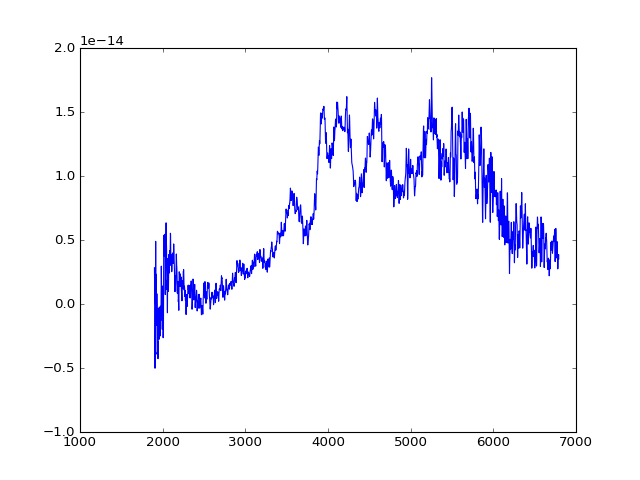

<IPython.core.display.Javascript object>


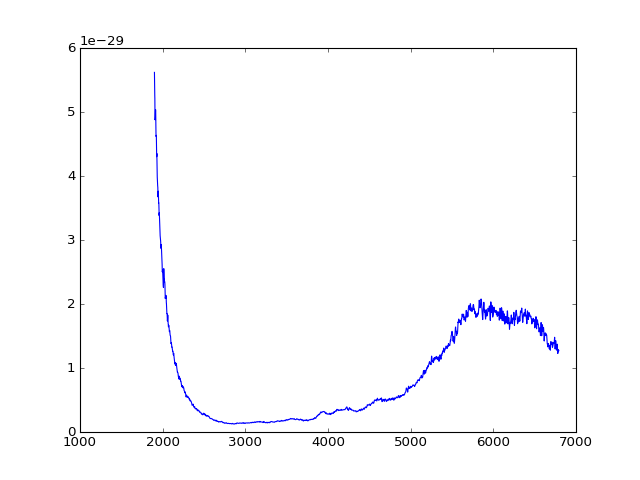

0.00448391999357 2.85605737952


<IPython.core.display.Javascript object>


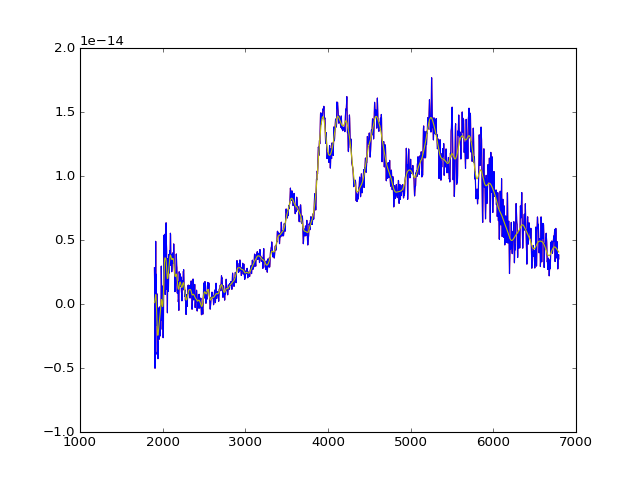

<IPython.core.display.Javascript object>


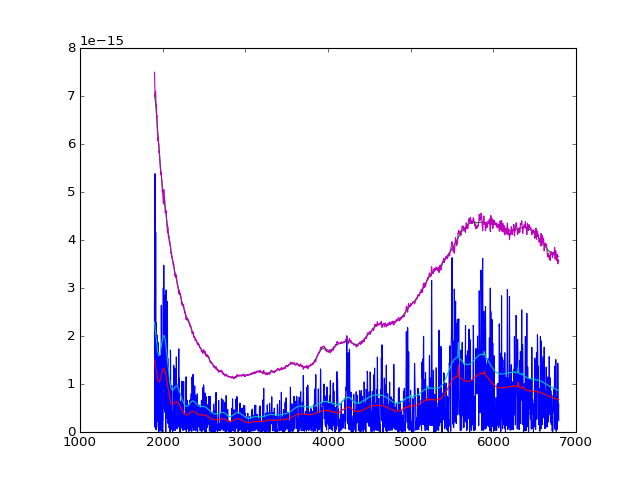

<IPython.core.display.Javascript object>


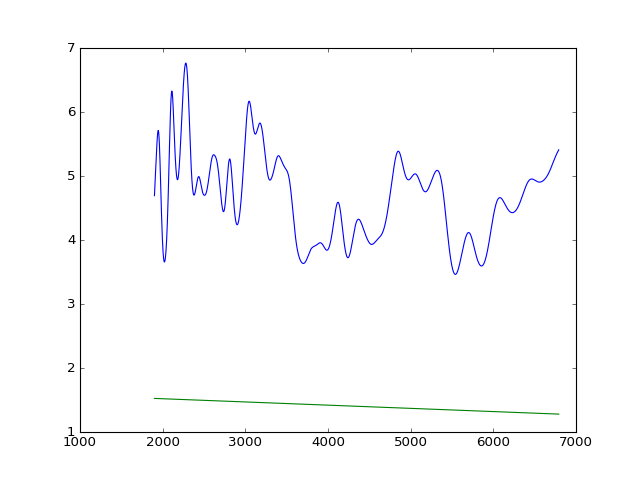

8.98925127594
Milky Way correction...


<IPython.core.display.Javascript object>


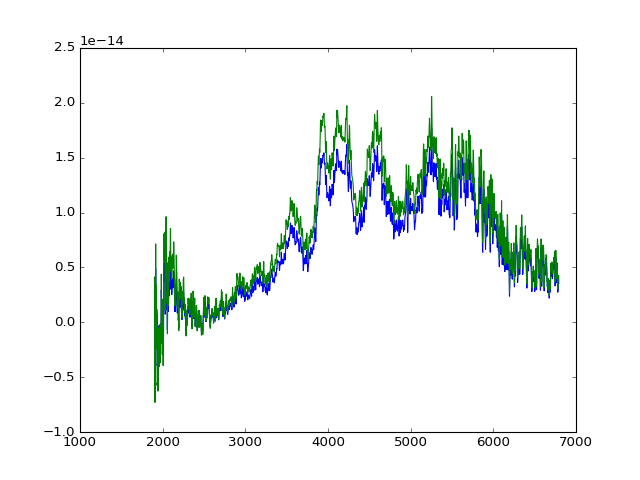

<IPython.core.display.Javascript object>


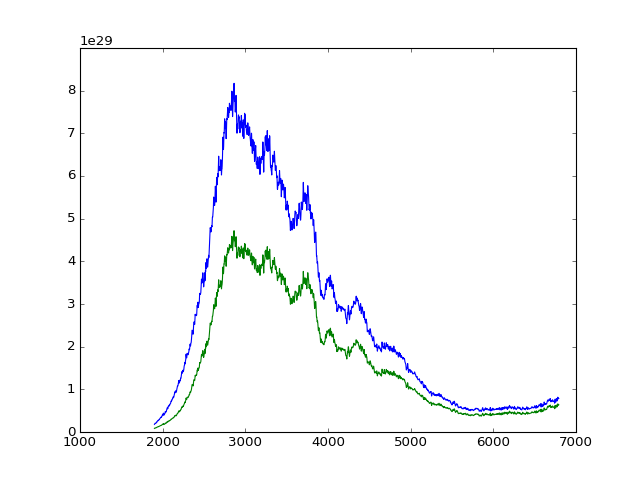

In [238]:
test_file = swift_names[10]
# test_file = '../../../cfa_test_data\sn2001V-20010325.40-mmt.flm'
print test_file
sn_name = test_file.split('\\')[1].split('-')[0][2:]
source = 'swift_uv'
redshift = NED_red_dict.get(sn_name.lower(), None)
if redshift is None:
    redshift = rsd.get(sn_name.lower(), None)
spectrum = np.loadtxt(test_file)
print sn_name, source, redshift
interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing=True)

In [98]:
foley_names = glob.glob("../../../ryan_hst/*.flm")

../../../ryan_hst\sn2011fe-visit7-hst.flm
2011fe foley_hst 0.000804


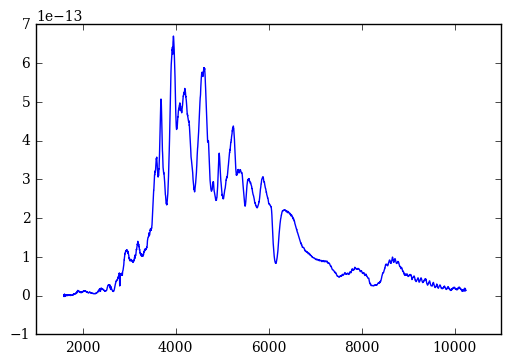

0.001 85.0655594512


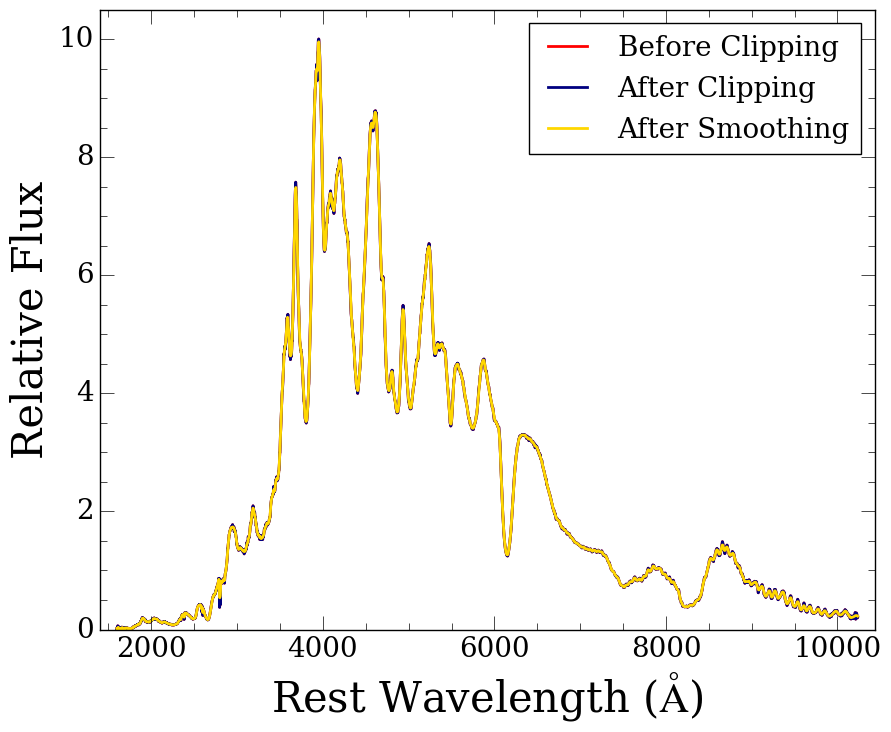

[ 0.00028224  0.00026336  0.00020176 ...,  0.00010888  0.00014161
  0.00014519]
1.0


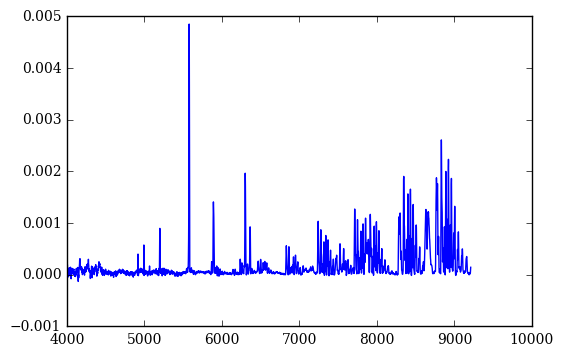

60.3950794914


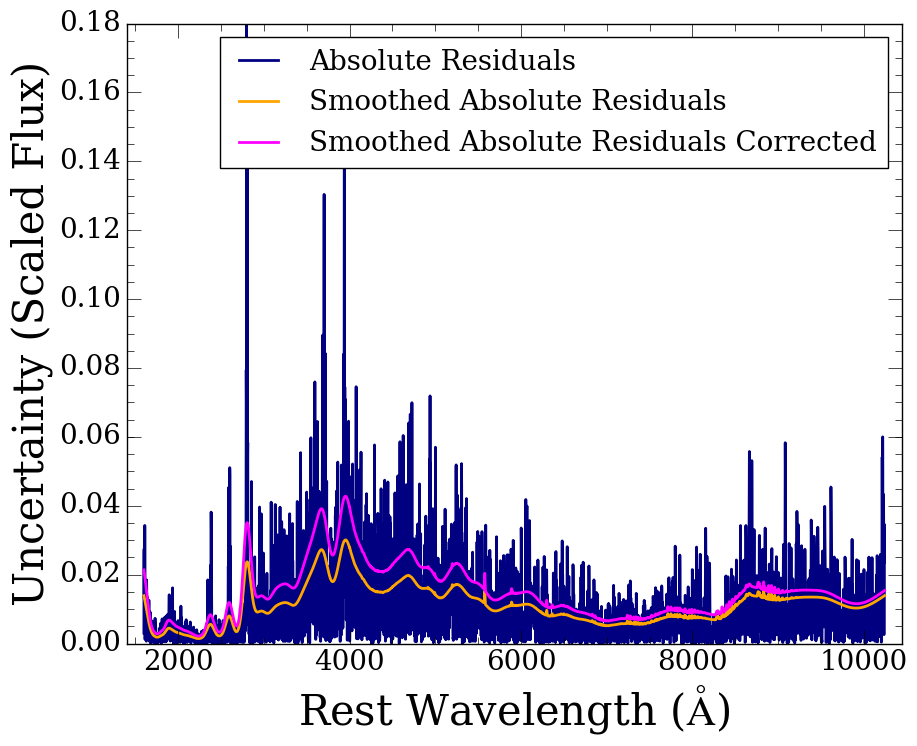

107.44444908


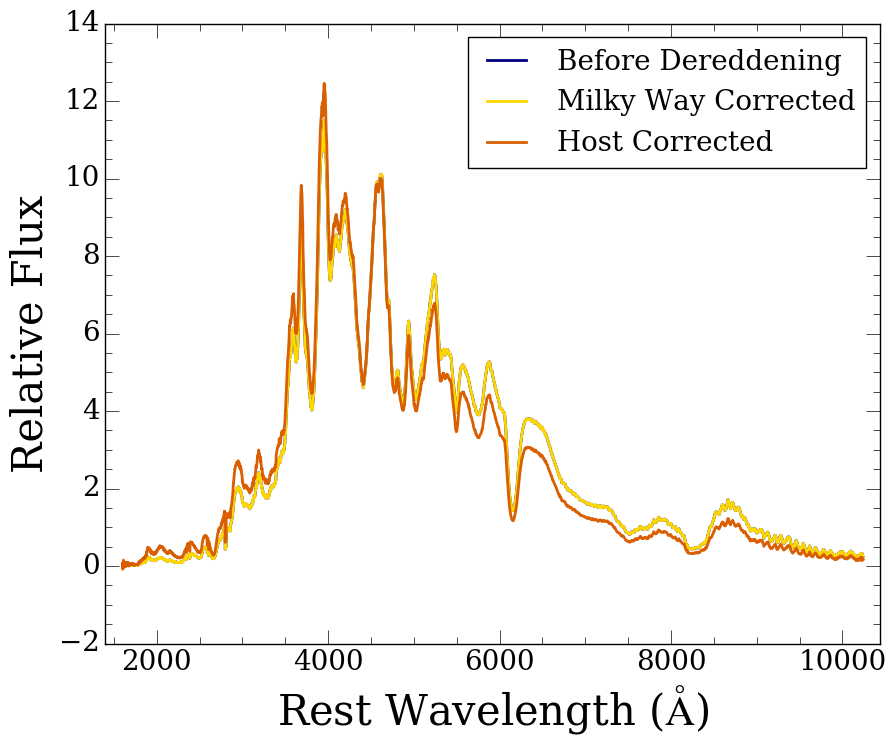

1.49879496884
1.12638873611


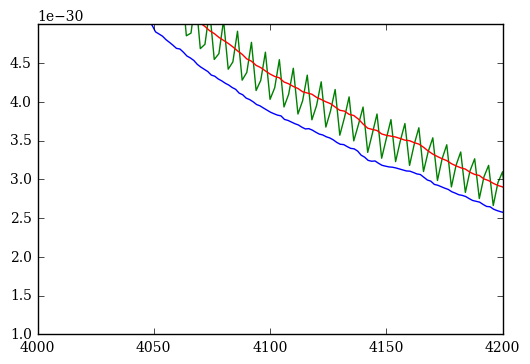

1.49879496884


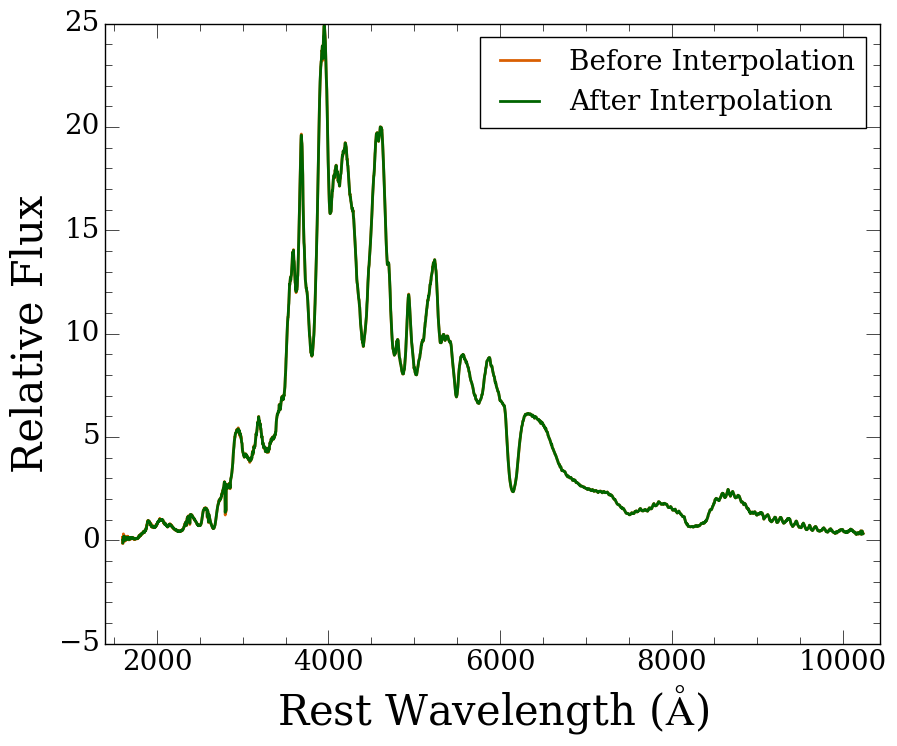

107.44444908


In [99]:
test_file = foley_names[10]
# test_file = '../../../cfa_test_data\sn2001V-20010325.40-mmt.flm'
print test_file
sn_name = test_file.split('\\')[1].split('-')[0][2:]
source = 'foley_hst'
redshift = NED_red_dict.get(sn_name.lower(), None)
if redshift is None:
    redshift = rsd.get(sn_name.lower(), None)
spectrum = np.loadtxt(test_file)
print sn_name, source, redshift
interp_spec, sig_noise = prep.compprep(spectrum, sn_name, redshift, source, testing=True)
print sig_noise